In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Load Data
df = pd.read_csv('Shale_Gas_Wells_DataSet.csv')
df

,Stage Spacing,bbl/ft,Well Spacing,Dip,Thickness,Lateral Length,Injection Rate,Porosity,ISIP,Water Saturation,Percentage of LG,Pressure Gradient,Proppant Loading,EUR,Category
0,140,38,850,0,165,8543,64,8.3,8200,17.1,38.0,0.95,3012,13.3,New_Design
1,140,30,900,0,174,8336,60,7.8,8061,16.0,59.3,0.95,2771,12.5,New_Design
2,140,30,900,0,174,9361,65,7.8,8061,16.0,59.3,0.95,3067,16.9,New_Design
3,140,30,950,0,175,9110,69,8.3,7922,15.7,66.9,0.95,3130,16.5,New_Design
4,140,30,950,0,175,9310,67,8.3,7922,15.7,66.9,0.95,2991,17.4,New_Design
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,140,30,750,0,160,8567,63,7.2,8200,16.6,86.5,0.95,2740,12.8,New_Design
502,140,30,700,0,160,7932,61,7.2,8200,16.6,86.5,0.95,2774,12.2,Vintage
503,140,30,700,0,160,9080,57,7.2,8200,16.6,86.5,0.95,2973,13.3,New_Design
504,140,30,750,0,160,8836,58,7.2,8200,16.6,86.5,0.95,2925,12.7,New_Design


In [2]:

# 2. Preprocessing: Select Geological Features
geo_features = ['Porosity', 'Thickness', 'Water Saturation', 'Pressure Gradient', 'Dip']
X_geo = df[geo_features]

# Standardize the data (Crucial for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_geo)



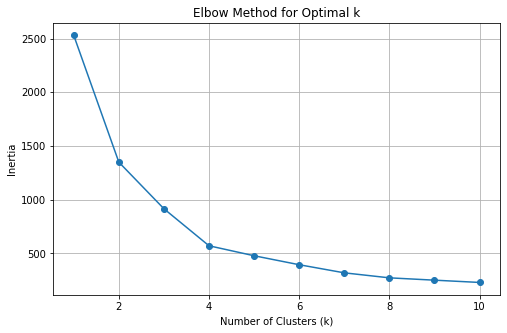

In [ ]:
# 3. Elbow Method to find optimal k
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


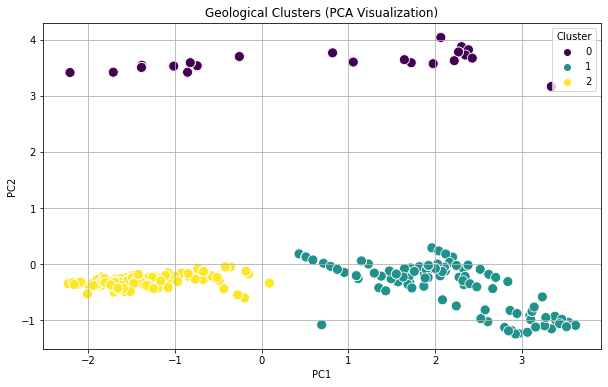

In [ ]:

# 4. Apply K-Means
k_optimal = 3
kmeans_final = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
clusters = kmeans_final.fit_transform(X_scaled) 
df['Cluster'] = kmeans_final.fit_predict(X_scaled)

# 5. Visualization with PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df['Cluster']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis', s=100)
plt.title('Geological Clusters (PCA Visualization)')
plt.grid(True)
plt.show()


In [ ]:

# 6. Cluster Analysis (interpreting the clusters)
# Calculate mean of geological features + EUR for each cluster
cluster_summary = df.groupby('Cluster')[geo_features + ['EUR']].mean()
print("Cluster Summary (Mean Values):")
cluster_summary



Cluster Summary (Mean Values):


,Porosity,Thickness,Water Saturation,Pressure Gradient,Dip,EUR
Cluster,,,,,,
0,7.162857,157.228571,18.791429,0.939143,1.0,14.814286
1,6.469143,147.051429,22.705714,0.901714,0.0,10.878857
2,7.871622,172.027027,17.198649,0.946081,0.0,13.775338


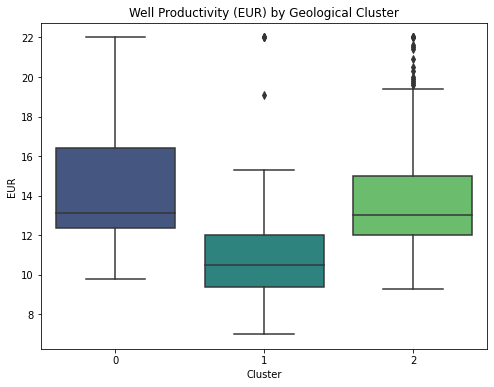

In [ ]:
# Boxplot of EUR by Cluster to see performance difference
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='EUR', data=df, palette='viridis')
plt.title('Well Productivity (EUR) by Geological Cluster')
plt.show()